In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
at2 = pd.read_csv('/content/Autism-Child-Data.csv')
at2.shape


(292, 22)

In [ ]:
at2.head

<bound method NDFrame.head of       id  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         1         0         0         1         1   
1      2         1         1         0         0         1         1   
2      3         1         1         0         0         0         1   
3      4         0         1         0         0         1         1   
4      5         1         1         1         1         1         1   
..   ...       ...       ...       ...       ...       ...       ...   
287  288         1         1         1         1         1         1   
288  289         1         0         0         0         1         0   
289  290         1         0         1         1         1         1   
290  291         1         1         1         0         1         1   
291  292         0         0         1         0         1         0   

     A7_Score  A8_Score  A9_Score  ...  gender        ethnicity jundice  \
0           0         1         0  ...       m           Others      no   
1           0         1         0  ...       m  Middle Eastern       no   
2           1         1         0  ...       m                ?      no   
3           0         0         0  ...       f                ?     yes   
4           1         1         1  ...       m           Others     yes   
..        ...       ...       ...  ...     ...              ...     ...   
287         1         1         1  ...       f   White-European     yes   
288         1         0         0  ...       f   White-European     yes   
289         1         0         0  ...       m           Latino      no   
290         1         1         1  ...       m      South Asian      no   
291         1         0         0  ...       f      South Asian      no   

    austim   contry_of_res used_app_before result    age_desc  relation  \
0       no          Jordan              no      5  4-11 years    Parent   
1       no          Jordan              no      5  4-11 years    Parent   
2       no          Jordan             yes      5  4-11 years         ?   
3       no          Jordan              no      4  4-11 years         ?   
4       no   United States              no     10  4-11 years    Parent   
..     ...             ...             ...    ...         ...       ...   
287    yes  United Kingdom              no     10  4-11 years    Parent   
288    yes       Australia              no      4  4-11 years    Parent   
289     no          Brazil              no      7  4-11 years    Parent   
290     no           India              no      9  4-11 years    Parent   
291     no           India              no      3  4-11 years    Parent   

    Class/ASD  
0          NO  
1          NO  
2          NO  
3          NO  
4         YES  
..        ...  
287       YES  
288        NO  
289       YES  
290       YES  
291        NO  

[292 rows x 22 columns]>

In [ ]:
at2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               292 non-null    int64 
 1   A1_Score         292 non-null    int64 
 2   A2_Score         292 non-null    int64 
 3   A3_Score         292 non-null    int64 
 4   A4_Score         292 non-null    int64 
 5   A5_Score         292 non-null    int64 
 6   A6_Score         292 non-null    int64 
 7   A7_Score         292 non-null    int64 
 8   A8_Score         292 non-null    int64 
 9   A9_Score         292 non-null    int64 
 10  A10_Score        292 non-null    int64 
 11  age              292 non-null    object
 12  gender           292 non-null    object
 13  ethnicity        292 non-null    object
 14  jundice          292 non-null    object
 15  austim           292 non-null    object
 16  contry_of_res    292 non-null    object
 17  used_app_before  292 non-null    ob

In [ ]:
at2.isnull().sum()

,0
id,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
at2.dtypes

,0
id,int64
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64


In [ ]:
# Assuming 'at2' is your DataFrame
columns_to_drop = ['result','age_desc','relation','ethnicity']  # Replace with the actual columns you want to drop
at2 = at2.drop(columns=columns_to_drop)

In [ ]:
at2.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,146.500000,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027
std,84.437354,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,146.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,219.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,292.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#DATA VISUALIZATION

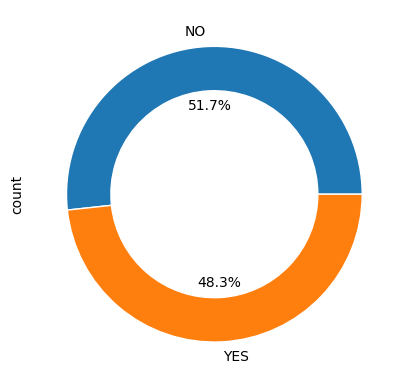

In [ ]:
at2["Class/ASD"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));

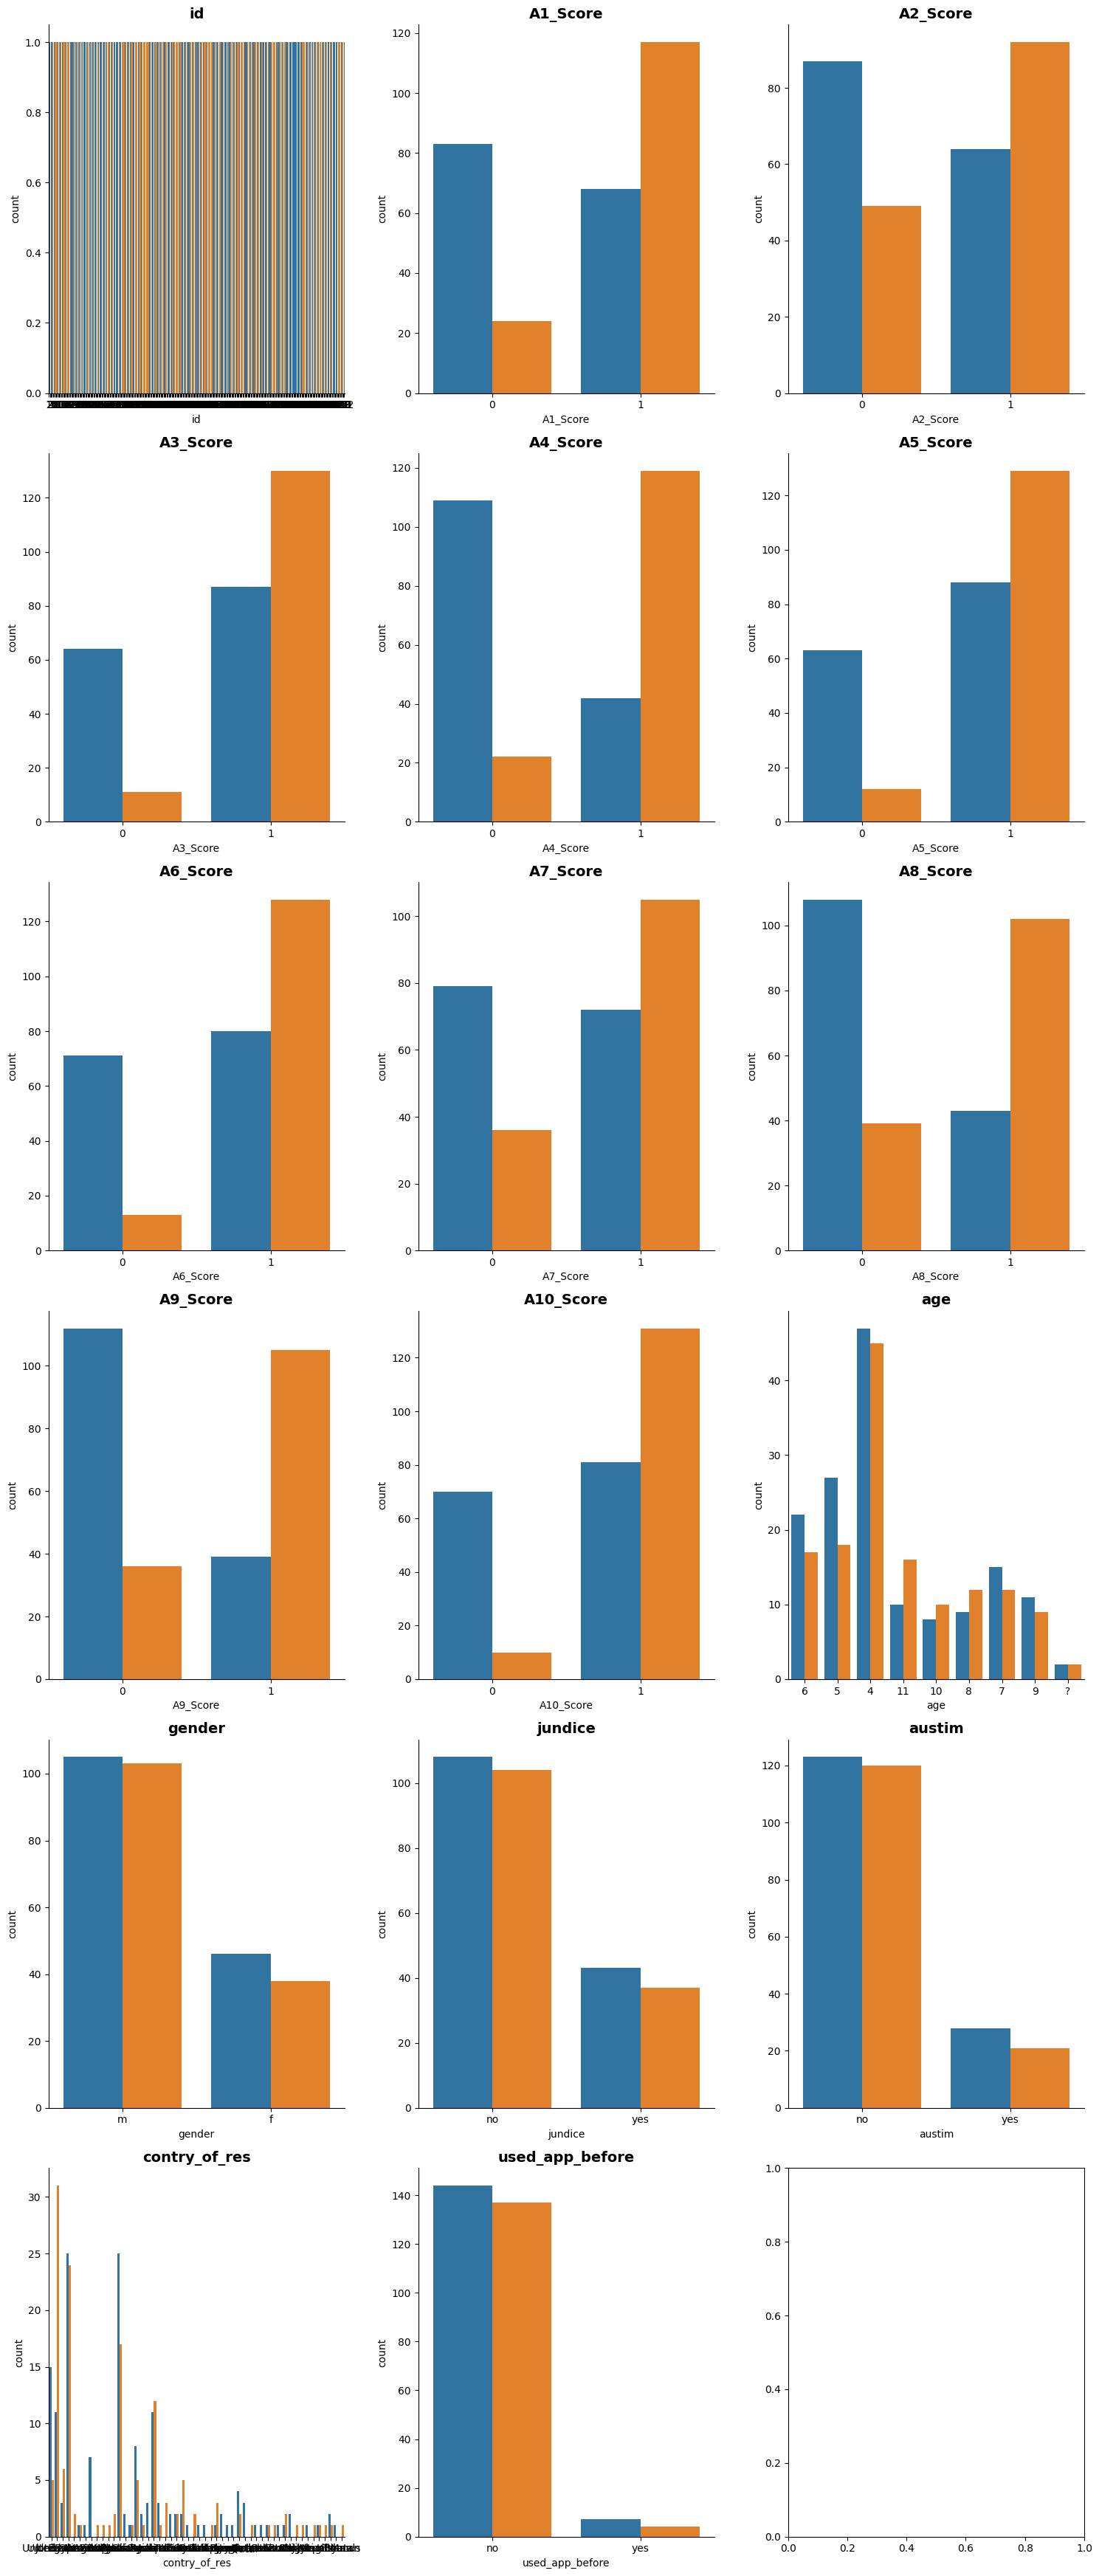

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows and columns needed for the subplots
# based on the number of features to plot.
num_features = at2.shape[1] - 1  # Exclude the target column
num_cols = 3  # Number of columns in the subplot grid
num_rows = int(num_features / num_cols) + (num_features % num_cols > 0)

# Create the subplots with the calculated number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 35))
axes = axes.ravel()

# Iterate through the features and plot them
for i, col in enumerate(at2.iloc[:, :-1]):  # Exclude the last column ("Class/ASD")
    sns.countplot(x=at2[col], ax=axes[i], hue=at2['Class/ASD'], legend=False)
    axes[i].set_title(col, fontsize=14, fontweight="bold")

    # Rotate x-axis labels for specific columns if needed
    if col in ["Who completed the test", "Ethnicity", "Age_Mons"]:
        axes[i].tick_params(axis="x", labelrotation=90)

    # Remove top and right spines for cleaner look
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

#DATA PREPROCESSING

In [ ]:
for col in at2.columns:
    print(f"Unique values in column '{col}': {at2[col].unique()}")


Unique values in column 'id': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [ ]:
at2.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'Class/ASD'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
# Assuming 'at2' is your DataFrame and 'Age' is the column name
# Replace '?' with NaN first, then convert the column to numeric
at2['age'] = at2['age'].replace('?', np.nan)
at2['age'] = pd.to_numeric(at2['age'], errors='coerce')

# Now you can handle the missing values (NaNs) as needed
# For example, you could fill them with the mean or median age:
mean_age = at2['age'].mean()
at2['age'].fillna(mean_age)

# Alternatively, you could remove rows with missing age values:
# at2.dropna(subset=['Age'], inplace=True)


,age
0,6.0
1,6.0
2,6.0
3,5.0
4,5.0
...,...
287,7.0
288,7.0
289,4.0
290,4.0


#ONEHOT ENCODING

In [ ]:
le = LabelEncoder()
at2["age"] = le.fit_transform(at2["age"])
at2["gender"] = le.fit_transform(at2["gender"])
at2["jundice"] = le.fit_transform(at2["jundice"])
at2["austim"] = le.fit_transform(at2["austim"])
at2["contry_of_res"] = le.fit_transform(at2["contry_of_res"])
at2["used_app_before"] = le.fit_transform(at2["used_app_before"])
at2["Class/ASD"] = le.fit_transform(at2["Class/ASD"])
at2.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,contry_of_res,used_app_before,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,0,2,1,0,0,24,0,0
1,2,1,1,0,0,1,1,0,1,0,0,2,1,0,0,24,0,0
2,3,1,1,0,0,0,1,1,1,0,0,2,1,0,0,24,1,0
3,4,0,1,0,0,1,1,0,0,0,1,1,0,1,0,24,0,0
4,5,1,1,1,1,1,1,1,1,1,1,1,1,1,0,51,0,1


In [ ]:
at2.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'Class/ASD'],
      dtype='object')

#DATA SPLITTING

In [ ]:
X = at2[['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'jundice', 'austim', 'contry_of_res', 'used_app_before', ]]  # Select your features
y = at2['Class/ASD']  # Select your target variable

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined from the previous code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Verify class balance in the training and testing sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
Class/ASD
0    0.514706
1    0.485294
Name: proportion, dtype: float64

Testing set class distribution:
Class/ASD
0    0.522727
1    0.477273
Name: proportion, dtype: float64


#FEATURE SCALING

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

#MODEL BUILDING

In [ ]:
def train_model(model, X_train_scaled, y_train, X_test_scaled, y_test):

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])
    return score_df

In [ ]:
# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)  # You can adjust n_neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"KNN Accuracy: {accuracy}")
print("KNN Classification Report:\n", report)

KNN Accuracy: 0.7966101694915254
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       0.62      1.00      0.77        20

    accuracy                           0.80        59
   macro avg       0.81      0.85      0.79        59
weighted avg       0.87      0.80      0.80        59



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Assuming X and y are your original feature and target data
# Split data before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "SVM Classifier": SVC(),
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {"Accuracy": accuracy, "Classification Report": report}

for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Classification Report']}")



Logistic Regression:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        37

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88


Decision Tree Classifier:
Accuracy: 0.8409090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85        51
           1       0.74      0.95      0.83        37

    accuracy                           0.84        88
   macro avg       0.85      0.86      0.84        88
weighted avg       0.86      0.84      0.84        88


Random Forest Classifier:
Accuracy: 0.8977272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        51
           1       0

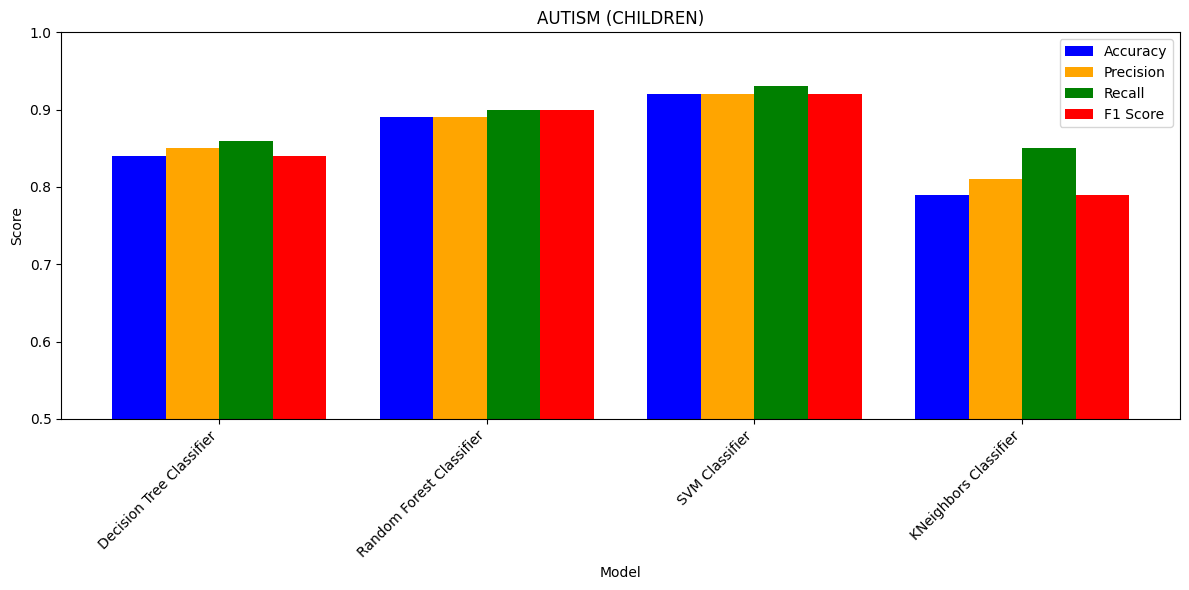

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = [
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "SVM Classifier",
    "KNeighbors Classifier"
]
# Accuracy, precision, recall, and f1-score values for each model
accuracy = [0.84, 0.89, 0.92, 0.79]
precision = [0.85, 0.89, 0.92, 0.81]
recall = [0.86, 0.90, 0.93, 0.85]
f1 = [0.84, 0.90, 0.92, 0.79]

# Define the bar width and positions
bar_width = 0.2
index = np.arange(len(model_names))

# Plotting the bars for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='orange')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='red')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('AUTISM (CHILDREN)')
plt.xticks(index + 1.5 * bar_width, model_names, rotation=45, ha='right')
plt.ylim(0.5, 1.0)  # Adjusted to include lower values like 0.6
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

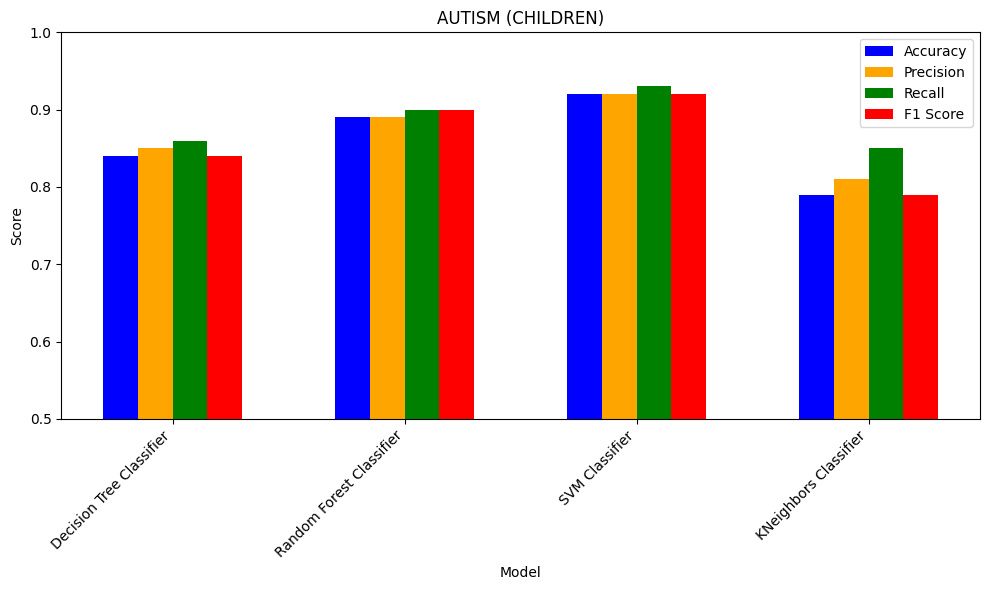

In [ ]:
# prompt: import matplotlib.pyplot as plt
# import numpy as np
# # Model names
# model_names = [
#     "Decision Tree Classifier",
#     "Random Forest Classifier",
#     "SVM Classifier",
#     "KNeighbors Classifier"
# ]
# # Accuracy, precision, recall, and f1-score values for each model
# accuracy = [0.84, 0.89, 0.92, 0.79]
# precision = [0.85, 0.89, 0.92, 0.81]
# recall = [0.86, 0.90, 0.93, 0.85]
# f1 = [0.84, 0.90, 0.92, 0.79]
# # Define the bar width and positions
# bar_width = 0.2
# index = np.arange(len(model_names))
# # Plotting the bars for each metric
# plt.figure(figsize=(12, 6))
# plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
# plt.bar(index + bar_width, precision, bar_width, label='Precision', color='orange')
# plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='green')
# plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='red')
# # Adding labels and title
# plt.xlabel('Model')
# plt.ylabel('Score')
# plt.title('AUTISM (CHILDREN)')
# plt.xticks(index + 1.5 * bar_width, model_names, rotation=45, ha='right')
# plt.ylim(0.5, 1.0)  # Adjusted to include lower values like 0.6
# plt.legend()
# # Display the plot
# plt.tight_layout()
# plt.show() reduce bar width and the graph width accordingly

import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = [
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "SVM Classifier",
    "KNeighbors Classifier"
]
# Accuracy, precision, recall, and f1-score values for each model
accuracy = [0.84, 0.89, 0.92, 0.79]
precision = [0.85, 0.89, 0.92, 0.81]
recall = [0.86, 0.90, 0.93, 0.85]
f1 = [0.84, 0.90, 0.92, 0.79]

# Define the bar width and positions
bar_width = 0.15  # Reduced bar width
index = np.arange(len(model_names))

# Plotting the bars for each metric
plt.figure(figsize=(10, 6)) #Reduced figure size
plt.bar(index, accuracy, bar_width, label='Accuracy', color='blue')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='orange')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='red')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('AUTISM (CHILDREN)')
plt.xticks(index + 1.5 * bar_width, model_names, rotation=45, ha='right')
plt.ylim(0.5, 1.0)  # Adjusted to include lower values like 0.6
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
